#**Anomaly Detection & Time Series Assignment**
**Assignment Code: DA-AG-018**

Q.1 What is Anomaly Detection? Explain its types (point, contextual & collective anomalies) with examples.

→ Anomaly Detection is the process of identifying data points, events, or patterns that deviate significantly from expected behavior. These anomalies often indicate critical incidents such as fraud, network intrusion, or equipment failure.

Types of Anomalies:
1. Point Anomaly:
- A single data point deviates from the rest.
- Ex.: In credit card transactions, a sudden Rs. 5000 transaction when the usual range is Rs. 20-100.
2. Contextual Anomaly:
- A data point is anomalous in a specific context.
- Ex.: 20°C temperature is normal in summer but abnormal in winter.
3. Collective Anomaly:
- A group of related data points is anomalous together.
- Ex.: A sudden drop in stock prices over consecutive days.

Q.2 Compare Isolation Forest, DBSCAN & Local Outlier Factor in terms of
their approach & suitable use cases.

→
1. Isolation Forest:
- Approach: Randomly splits data to isolate anomalies.
- Strength: Works well on high-dimensional data.
- Use Case: Fraud detection, rare event detection.
2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
- Approach: Groups dense clusters, points in sparse regions are anomalies.
- Strength: Handles non-linear shapes & noise.
- Use Case: Geospatial anomaly detection, sensor data.
3. Local Outlier Factor (LOF):
- Approach: Measures local density deviation from neighbors.
- Strength: Detects local anomalies better than global methods.
- Use Case: Network intrusion detection, manufacturing defects.

Q.3 What are the key components of a Time Series? Explain each with one
example.

→ The key components of a Time Series are as follows:
1. Trend: Long-term movement (ex.: increasing stock prices).
2. Seasonality: Repeating patterns at fixed intervals (ex.: ice cream sales in summer).
3. Cyclic: Fluctuations not at fixed intervals (ex.: business cycles).
4. Residual (Noise): Random variations unexplained by other components.

Q.4 Define Stationary in time series. How can you test & transform a
non-stationary series into a stationary one?

→
- Stationary: Mean, variance & autocorrelation remain constant over time.
- Tests: Augmented Dickey-Fuller (ADF) test, KPSS test.
- Transformations: Differencing (subtract previous values), Log transformation & Seasonal differencing.

Q.5 Differentiate between AR, MA, ARIMA, SARIMA & SARIMAX models in
terms of structure & application.

→
- AR (Auto-Regressive): Depends on past values. Example: AR(2) → uses last 2 lags.
- MA (Moving Average): Depends on past errors. Example: MA(1) → previous error.
- ARIMA (AR + I + MA): Adds Integrated part for differencing.
- SARIMA: ARIMA + seasonality handling.
- SARIMAX: SARIMA + external regressors (ex.: weather, promotions).

Q.6 Load a time series dataset (e.g., AirPassengers), plot the original series & decompose it into trend, seasonality & residual components.

→

/tmp/ipython-input-1090559428.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')


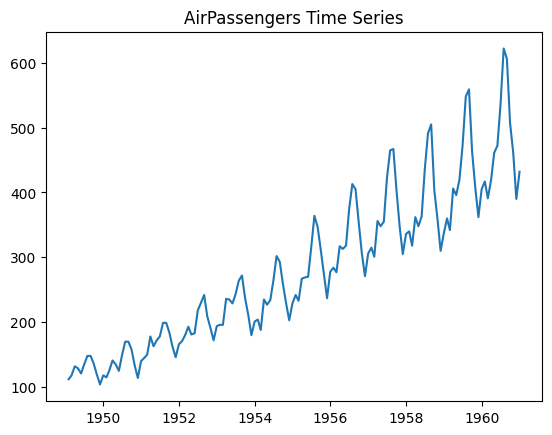

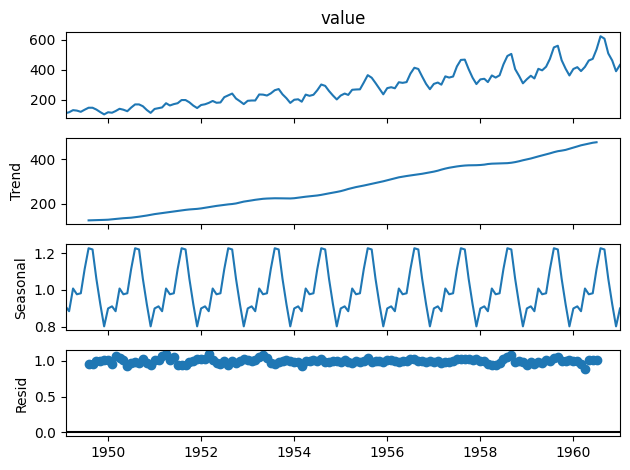

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

data = get_rdataset("AirPassengers").data
data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('Month', inplace=True)

plt.plot(data['value'])
plt.title("AirPassengers Time Series")
plt.show()

decomp = seasonal_decompose(data['value'], model='multiplicative')
decomp.plot()
plt.show()

Q.7 Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.

→

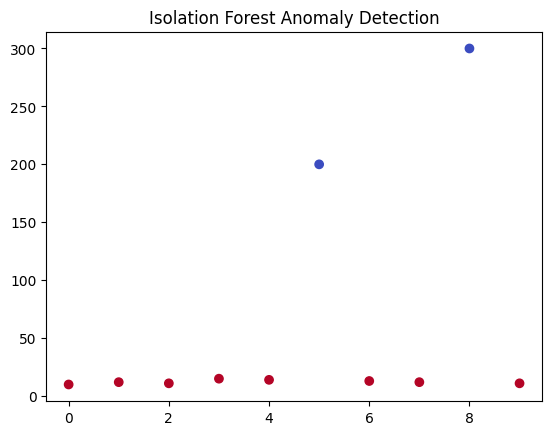

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

df = pd.DataFrame({
    "fare_amount": [10, 12, 11, 15, 14, 200, 13, 12, 300, 11]
})
iso = IsolationForest(contamination=0.2, random_state=42)
df['anomaly'] = iso.fit_predict(df[['fare_amount']])

plt.scatter(range(len(df)), df['fare_amount'], c=df['anomaly'], cmap='coolwarm')
plt.title("Isolation Forest Anomaly Detection")
plt.show()

Q.8 Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months & visualize the results.

→

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


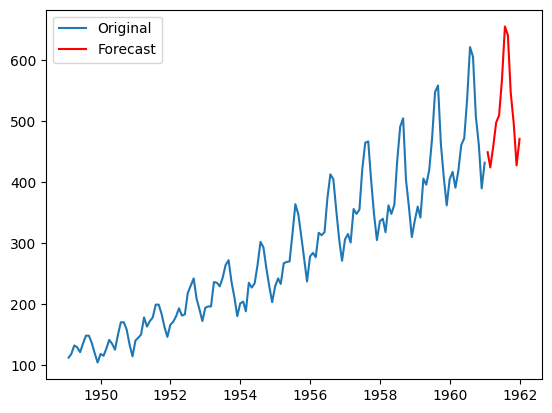

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data['value'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

forecast = results.forecast(12)
plt.plot(data['value'], label="Original")
plt.plot(forecast, label="Forecast", color="red")
plt.legend()
plt.show()

Q.9 Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies & visualize them using matplotlib.

→

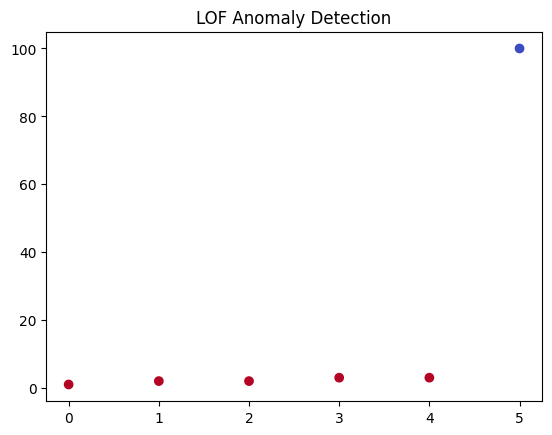

In [6]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

X = np.array([[1],[2],[2],[3],[3],[100]]).reshape(-1,1)
lof = LocalOutlierFactor(n_neighbors=2)
y_pred = lof.fit_predict(X)

plt.scatter(range(len(X)), X, c=y_pred, cmap='coolwarm')
plt.title("LOF Anomaly Detection")
plt.show()

Q.10 You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand & also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions & energy usage. Explain your real-time data science workflow:

● How would you detect anomalies in this streaming data (Isolation Forest/LOF/DBSCAN)?

● Which time series model would you use for short-term forecasting (ARIMA/SARIMA/SARIMAX)?

● How would you validate & monitor the performance over time?

● How would this solution help business decisions or operations?

→

Real-Time Energy Demand Forecasting & Anomaly Detection process as follows:
1. Anomaly Detection:
- Use Isolation Forest for global anomalies.
- Use LOF for local anomalies in different regions.
- DBSCAN for cluster-based detection in streaming.
2. Short-term Forecasting:
- Use SARIMAX (handles seasonality + external regressors like weather).
3. Validation & Monitoring:
- Rolling window validation.
- Track metrics (MAPE, RMSE).
- Online learning updates.
4. Business Impact:
- Prevent blackouts by detecting abnormal spikes early.
- Optimize power distribution across regions.
- Reduce operational costs by forecasting demand accurately.